In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fiu-cap5610-spring-2023/sample_submission.csv
/kaggle/input/fiu-cap5610-spring-2023/train.csv
/kaggle/input/fiu-cap5610-spring-2023/test.csv
/kaggle/input/fiu-cap5610-spring-2023/images/4353.png
/kaggle/input/fiu-cap5610-spring-2023/images/2664.png
/kaggle/input/fiu-cap5610-spring-2023/images/2539.png
/kaggle/input/fiu-cap5610-spring-2023/images/1231.png
/kaggle/input/fiu-cap5610-spring-2023/images/1017.png
/kaggle/input/fiu-cap5610-spring-2023/images/4803.png
/kaggle/input/fiu-cap5610-spring-2023/images/2437.png
/kaggle/input/fiu-cap5610-spring-2023/images/3217.png
/kaggle/input/fiu-cap5610-spring-2023/images/3207.png
/kaggle/input/fiu-cap5610-spring-2023/images/2015.png
/kaggle/input/fiu-cap5610-spring-2023/images/2300.png
/kaggle/input/fiu-cap5610-spring-2023/images/2673.png
/kaggle/input/fiu-cap5610-spring-2023/images/2823.png
/kaggle/input/fiu-cap5610-spring-2023/images/3765.png
/kaggle/input/fiu-cap5610-spring-2023/images/1522.png
/kaggle/input/fiu-cap5610-spring-20

In [2]:
!pip3 install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pathlib
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
#from keras.preprocessing.image import array_to_img
#from keras.preprocessing.image import save_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
# from keras.preprocessing.image import array_to_img
# from keras.preprocessing.image import save_img
from tensorflow.keras.utils import save_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.optimizers import rmsprop_v2
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [4]:
#from keras.datasets import mnist
train_data = pd.read_csv('/kaggle/input/fiu-cap5610-spring-2023/train.csv')
test_data = pd.read_csv('/kaggle/input/fiu-cap5610-spring-2023/test.csv')

train_data['img_id'] = train_data['id'].astype('str') + '.png'
test_data['img_id'] = test_data['id'].astype('str') + '.png'

In [5]:
image_location = '/kaggle/input/fiu-cap5610-spring-2023/images'

In [6]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

train_generator=datagen.flow_from_dataframe(dataframe=train_data, directory=image_location, 
                                            x_col="img_id", 
                                            y_col="class", 
                                            class_mode="categorical", 
                                            target_size=(32,32), batch_size=32)

valid_generator=datagen.flow_from_dataframe(dataframe=train_data, directory=image_location, 
                                            x_col="img_id", 
                                            y_col="class", 
                                            subset="validation",
                                            class_mode="categorical", 
                                            target_size=(32,32), batch_size=32)


test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe( dataframe=test_data, directory=image_location,
                                                x_col="img_id", 
                                                y_col=None, 
                                                #batch_size=32,
                                                shuffle = False,
                                                class_mode=None,
                                                target_size=(32,32))

Found 4000 validated image filenames belonging to 20 classes.
Found 800 validated image filenames belonging to 20 classes.
Found 1000 validated image filenames.


In [7]:
# from tensorflow.keras.utils import to_categorical

# num_classes = 10
# Y_train = to_categorical(Y_train, num_classes)
# Y_test = to_categorical(Y_test, num_classes)

# print(Y_train.shape, Y_test.shape)

In [8]:
# #applying Lenet-5 of CNN

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# model.add(AveragePooling2D((2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(AveragePooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(20, activation='softmax'))

# model.compile(optimizer='adam',
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])

In [9]:
#applying alexnet
# Initialize the model
model = Sequential()

# layer 1: convolutional layer + max-pooling layer
model.add(Conv2D(filters = 96, kernel_size = (11,11), padding = 'same', activation='relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

# layer 2: convolutional layer + max-pooling layer 
model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# layers 3-5: three convolutional layers + 1 max-pooling layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'softmax'))

# compile the model with a loss funciton, a metric and and optimizer method for estimating the loss function

model.compile(optimizers.SGD(lr=0.1),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [11]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
125/125 [==============================] - 26s 123ms/step - loss: 2.9953 - accuracy: 0.0475 - val_loss: 2.9948 - val_accuracy: 0.0425
Epoch 2/50
125/125 [==============================] - 8s 63ms/step - loss: 2.9942 - accuracy: 0.0610 - val_loss: 2.9949 - val_accuracy: 0.0425
Epoch 3/50
125/125 [==============================] - 8s 64ms/step - loss: 2.9933 - accuracy: 0.0540 - val_loss: 2.9951 - val_accuracy: 0.0425
Epoch 4/50
125/125 [==============================] - 9s 75ms/step - loss: 2.9932 - accuracy: 0.0562 - val_loss: 2.9949 - val_accuracy: 0.0425
Epoch 5/50
125/125 [==============================] - 8s 67ms/step - loss: 2.9928 - accuracy: 0.0625 - val_loss: 2.9947 - val_accuracy: 0.0425
Epoch 6/50
125/125 [==============================] - 8s 62ms/step - loss: 2.9924 - accuracy: 0.0590 - val_loss: 2.9943 - val_accuracy: 0.0425
Epoch 7/50
125/125 [==============================] - 8s 67ms/step - loss: 2.9923 - accuracy: 0.0562 - val_loss: 2.9939 - val_accuracy: 0.04

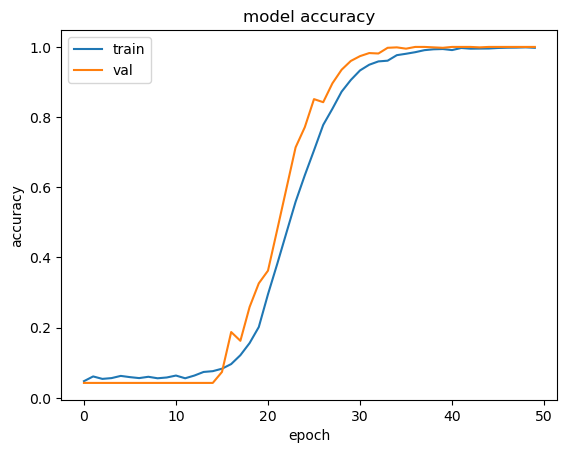

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
pred=model.predict_generator(test_generator)

test_generator.reset()
pred2=model.predict_generator(test_generator)

pred3 = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [14]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices2=np.argmax(pred2,axis=1)
predicted_class_indices3=np.argmax(pred3,axis=1)

In [15]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [16]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [17]:
filenames=test_generator.filenames
file_int = []
for i in filenames:
    file_int.append(int(i[:-4]))

In [18]:
outputs=pd.DataFrame({"id":filenames,
                      "class":predictions})

In [19]:
outputs

,id,class
0,3991.png,D3
1,1337.png,A2
2,83.png,C4
3,2688.png,C2
4,4363.png,D4
...,...,...
995,947.png,D4
996,294.png,D0
997,2068.png,A1
998,607.png,C0
